<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_03_computer_vision_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Computer Vision and Convolutional Neural Networks

In this notebook we're going to cover:
* Getting a dataset to work with
* Architecture of a convolutional neural network (CNN)
* And end-to-end binary image classification problem
* Steps in modeling with CNNs
* An end-to-end multiclass image classificatoin problem
* Making predicitons on our own custom images

# Get Food101 Data

In [1]:
# load library
import zipfile
import os
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-03-15 07:19:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   112MB/s    in 0.9s    

2022-03-15 07:19:51 (112 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [3]:
# see how many files are in the steak and pizza folder
print(len(os.listdir("pizza_steak/train/steak")))
print(len(os.listdir("pizza_steak/train/pizza")))

750
750


In [4]:
# View an image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


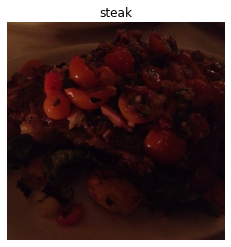

In [5]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="steak"
)

Image shape: (512, 512, 3)


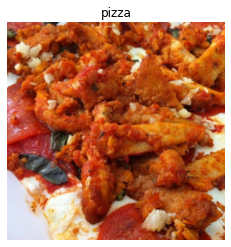

In [6]:
# view an random imag
img = view_random_image(
    target_dir="pizza_steak/train/",
    target_class="pizza"
)

In [7]:
# get tensor's shape
tf.constant(img).shape

TensorShape([512, 512, 3])

# An End-to-End Example

In [8]:
# set seed
tf.random.set_seed(42)

In [9]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# setup path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [11]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# build a CNN model
tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, kernel_size=3, activation='relu', 
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_0.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

hist_0 = model_0.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 23s 378ms/step - loss: 0.6203 - accuracy: 0.6280 - val_loss: 0.4247 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4389 - accuracy: 0.8027 - val_loss: 0.3472 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4005 - accuracy: 0.8300 - val_loss: 0.3367 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3581 - accuracy: 0.8440 - val_loss: 0.2934 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3256 - accuracy: 0.8727 - val_loss: 0.3198 - val_accuracy: 0.8780


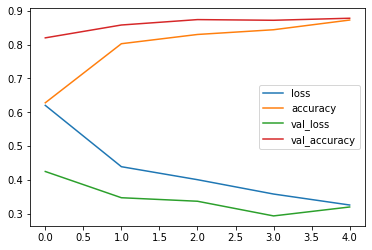

In [13]:
# plot losses
pd.DataFrame(hist_0.history).plot()
plt.show()

In [14]:
# view model
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# View & Preprocess Image Data

Image shape: (384, 512, 3)
Image shape: (512, 341, 3)


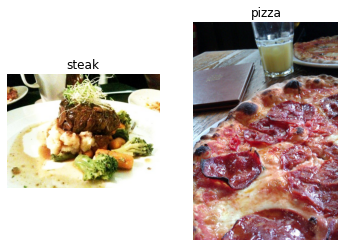

In [15]:
# view pizza vs steak images randomly
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [16]:
# define directory datasewt paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [17]:
# create train and test data generator and rescale the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
# get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [20]:
# how many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [21]:
# check image
images[0]

array([[[0.42352945, 0.43137258, 0.34509805],
        [0.31764707, 0.3254902 , 0.2392157 ],
        [0.26666668, 0.28235295, 0.18431373],
        ...,
        [0.42352945, 0.34901962, 0.37254903],
        [0.427451  , 0.34901962, 0.39607847],
        [0.45098042, 0.36862746, 0.427451  ]],

       [[0.2901961 , 0.30588236, 0.21568629],
        [0.45882356, 0.47450984, 0.37647063],
        [0.2627451 , 0.28627452, 0.18431373],
        ...,
        [0.39607847, 0.34117648, 0.34117648],
        [0.4156863 , 0.36862746, 0.37647063],
        [0.39607847, 0.34901962, 0.3647059 ]],

       [[0.37254903, 0.39607847, 0.29411766],
        [0.39607847, 0.41960788, 0.31764707],
        [0.30588236, 0.34117648, 0.23529413],
        ...,
        [0.34509805, 0.3254902 , 0.3019608 ],
        [0.30980393, 0.29803923, 0.27058825],
        [0.3372549 , 0.3254902 , 0.30588236]],

       ...,

       [[0.5137255 , 0.5019608 , 0.54509807],
        [0.52156866, 0.50980395, 0.54509807],
        [0.5294118 , 0

In [22]:
# see what first batch of label look slike
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

# Create A Baseline CNN Model

CNN parameters:
* filters: decides how many filters should pass over an input tensor (e.g. sliding windows over an image)
* kernel_size: determines the shape of the filters (sliding windows) over the output
* padding: pads the target tensor with zeroes (if `"same"`) to preserve input shape, or leaves in the target tensor as is (if `"valid"`), lowering output shape
* strides: the nubmer of steps a filter takes across an image at a time (e.g. if `strides=1`, a filter moves across an image 1 pixel at a time)

In [23]:
# create a simple baseline model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10, # number of moving windows
        kernel_size=3, # size per window
        strides=1, # steps each window takes
        padding="valid", # condensed output
        activation="relu",
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [24]:
# compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [25]:
# get summary of model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit the model
hist_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 13s 260ms/step - loss: 0.8200 - accuracy: 0.6527 - val_loss: 0.4748 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 12s 245ms/step - loss: 0.4284 - accuracy: 0.8027 - val_loss: 0.3362 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3352 - accuracy: 0.8693 - val_loss: 0.3630 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 12s 256ms/step - loss: 0.2541 - accuracy: 0.9027 - val_loss: 0.3567 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 12s 246ms/step - loss: 0.1511 - accuracy: 0.9560 - val_loss: 0.3285 - val_accuracy: 0.8580


In [27]:
# evaluate baseline model
model_1.evaluate(test_data)

16/16 [==============================] - 3s 170ms/step - loss: 0.3285 - accuracy: 0.8580


[0.32847118377685547, 0.8579999804496765]

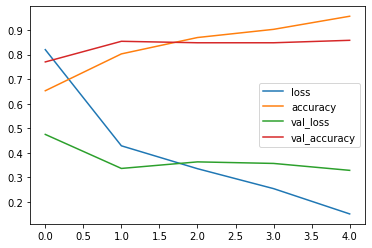

In [28]:
# plot history
pd.DataFrame(hist_1.history).plot()
plt.show()

In [29]:
# plot loss and accruacy separately using a function
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    fit, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
    ax[0].plot(epochs, loss, label='training_loss')
    ax[0].plot(epochs, val_loss, label='val_loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    ax[1].plot(epochs, accuracy, label='training_accuracy')
    ax[1].plot(epochs, val_accuracy, label='val_accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.tight_layout()
    plt.show()

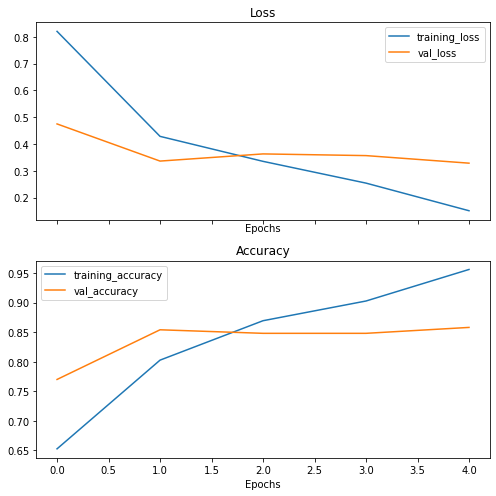

In [30]:
# plot loss and accuracy of model_1
plot_loss_curves(hist_1)

# Reducing Overfitting: Max Pooling

In [31]:
# one way to do that for CNN is with MaxPooling
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [32]:
# compile and fit
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

hist_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 12s 235ms/step - loss: 0.6127 - accuracy: 0.6607 - val_loss: 0.4906 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4870 - accuracy: 0.7740 - val_loss: 0.4164 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4268 - accuracy: 0.8093 - val_loss: 0.3478 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3986 - accuracy: 0.8280 - val_loss: 0.3251 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3638 - accuracy: 0.8407 - val_loss: 0.3073 - val_accuracy: 0.8820


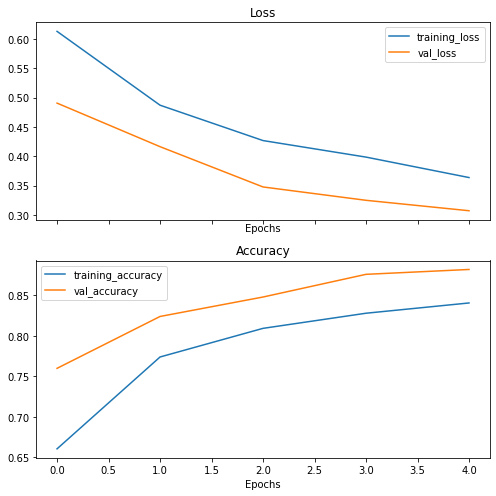

In [33]:
# view loss with model_2
plot_loss_curves(hist_2)

In [34]:
# evaluate model_2
model_2.evaluate(test_data)

16/16 [==============================] - 3s 160ms/step - loss: 0.3073 - accuracy: 0.8820


[0.30731797218322754, 0.8820000290870667]

# Reducing Overfitting: Data Augmentation

Increase the diversity of your training dataset without collecting more data (e.g. take your photos of pizza and randomly rotate them 30 degrees). Increase diversity forces a model to learn more generalization patterns. Data augmentation is usually only performed on the training data.

In [35]:
# create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

train_datagen = ImageDataGenerator(rescale=1/255.) 
test_datagen = ImageDataGenerator(rescale=1/255.)

In [36]:
# create data from datagen, augmented vs unaugmented
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False # for purpose of demonstration & comparison
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [37]:
# visualize
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

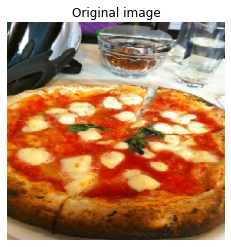

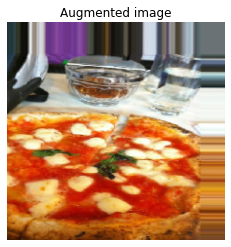

In [38]:
# show original
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# Train Model with Augmented Data

In [39]:
# build, compile, fit with augmented data
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

hist_3 = model_3.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 27s 567ms/step - loss: 0.7067 - accuracy: 0.4847 - val_loss: 0.6834 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6897 - accuracy: 0.5353 - val_loss: 0.6648 - val_accuracy: 0.5900
Epoch 3/5
47/47 [==============================] - 26s 562ms/step - loss: 0.6925 - accuracy: 0.5587 - val_loss: 0.6371 - val_accuracy: 0.6660
Epoch 4/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6767 - accuracy: 0.5987 - val_loss: 0.5668 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 26s 564ms/step - loss: 0.6927 - accuracy: 0.6553 - val_loss: 0.8946 - val_accuracy: 0.5160


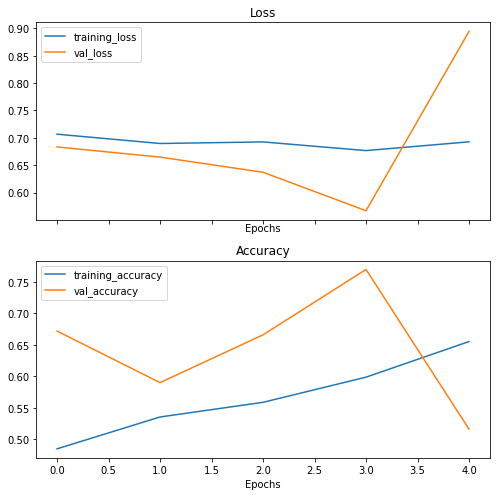

In [40]:
# ran longer and performed poorer
plot_loss_curves(hist_3)

In [41]:
# recreate datagens with shuffle back on
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [42]:
# build, compile, fit with augmented data
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

hist_4 = model_4.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 27s 558ms/step - loss: 0.7076 - accuracy: 0.4787 - val_loss: 0.6820 - val_accuracy: 0.5580
Epoch 2/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6981 - accuracy: 0.5133 - val_loss: 0.6730 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6850 - accuracy: 0.5093 - val_loss: 0.6639 - val_accuracy: 0.5060
Epoch 4/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6970 - accuracy: 0.5040 - val_loss: 0.6815 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6949 - accuracy: 0.5947 - val_loss: 0.6886 - val_accuracy: 0.5840


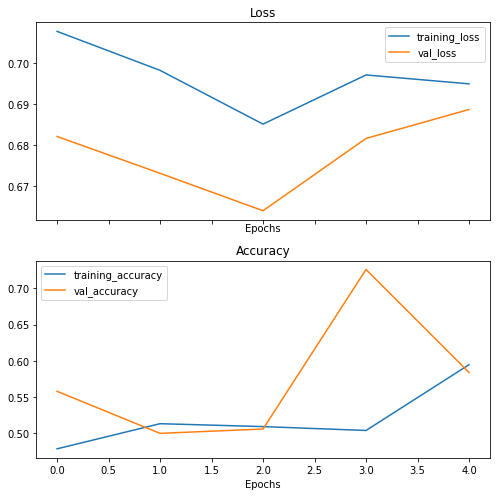

In [43]:
# view curves again -- much better
plot_loss_curves(hist_4)

# Back To TinyVGG Model

In [44]:
# back to same as TinyVGG (model_0)
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

hist_5 = model_5.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 28s 574ms/step - loss: 0.6225 - accuracy: 0.6407 - val_loss: 0.5070 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 27s 570ms/step - loss: 0.5500 - accuracy: 0.7193 - val_loss: 0.3509 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 27s 567ms/step - loss: 0.4973 - accuracy: 0.7560 - val_loss: 0.3615 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 27s 564ms/step - loss: 0.4997 - accuracy: 0.7580 - val_loss: 0.3467 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 27s 566ms/step - loss: 0.4579 - accuracy: 0.8020 - val_loss: 0.3375 - val_accuracy: 0.8580


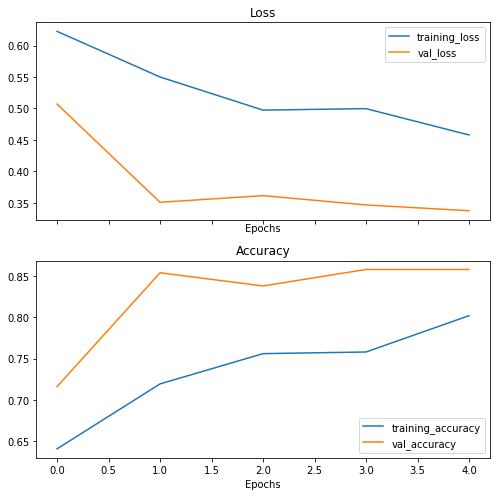

In [45]:
# plot TinyVGG loss curves
plot_loss_curves(hist_5)

# Making a Prediction

--2022-03-15 07:30:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-03-15 07:30:36 (33.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



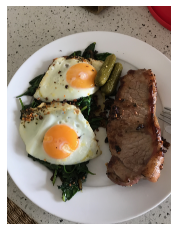

In [46]:
# view an example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [47]:
# write a function to load and preprocess image for inference
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    return img / 255.

In [48]:
# load and prep sample image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [49]:
# predict
pred = model_5.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.91679937]], dtype=float32)

In [50]:
# get list of classes
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [51]:
# predict class
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [52]:
# function to predict and plot
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

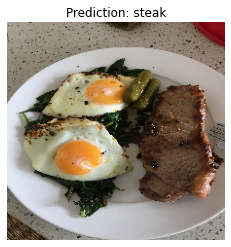

In [53]:
# pred and show
pred_and_plot(model_5, "03-steak.jpeg")

# Try Another Image

--2022-03-15 07:30:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-03-15 07:30:38 (43.3 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



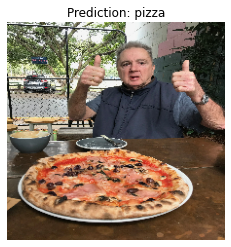

In [54]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_5, "03-pizza-dad.jpeg")

# Multiclass Classification with CNNs